In [4]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from moleculekit.molecule import Molecule
import parmed
import nglview as ng
import MDAnalysis as md

import openmm.app as app
from openmm import Platform, LangevinMiddleIntegrator, XmlSerializer
from openmm.unit import picosecond, kelvin
from openmm import unit
import openmm

import mymd

In [2]:
data_path = '../../data/acc_md_with_ai/aspirin/'
dcd_path = '../../data/acc_md_with_ai/aspirin/rslt_mymd_net/'

pdb_file = os.path.join(data_path, 'aspirin.pdb')
psf_file = os.path.join(data_path, 'aspirin.psf')
prmtop_file = os.path.join(data_path, 'aspirin.prmtop')

In [3]:
u = md.Universe(psf_file, os.path.join(dcd_path, 'traj.dcd'))
ng.show_mdanalysis(u, gui=True)

2023-05-15 20:19:17,328 - MDAnalysis.topology.PSF - WARNING - Guessing that this is actually a NAMD-type PSF file... continuing with fingers crossed!


NGLWidget(max_frame=500)

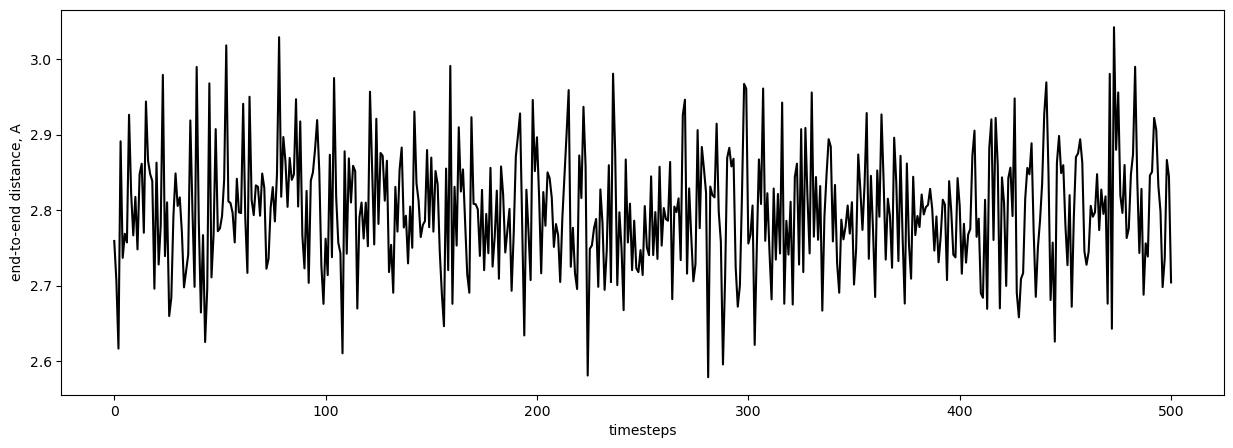

In [18]:
N_terminus = u.select_atoms('resid 1 and name O1')
C_terminus = u.select_atoms('resid 1 and name O2')

# go through the whole trajectory and compute distance between them for every frame
dist = []
for frame in u.trajectory:
    dist.append(np.linalg.norm(N_terminus.positions - C_terminus.positions))

# the result is in the dist array
dist = np.array(dist)
plt.figure(figsize=(15,5))

plt.plot(dist, '-k' )
plt.xlabel('timesteps')
plt.ylabel('end-to-end distance, A')

plt.show()